# 03_01_sunspot.py

In [1]:
import cv2
import numpy as np
from scipy.ndimage import label, center_of_mass
import matplotlib.pyplot as plt

In [3]:
import os
from pathlib import Path
BASEPATH = Path("./")
save_dir_name = "SDO_images"
print(f"BASEPATH: {BASEPATH}")

if not (BASEPATH/save_dir_name).exists():
    os.mkdir(str(BASEPATH/save_dir_name))
    print (f"{str(BASEPATH/save_dir_name)} is created...")
else :
    print (f"{str(BASEPATH/save_dir_name)} is already exist...")

BASEPATH: .
SDO_images is created...


In [10]:
fname = "20170228_231038_1024_HMII.jpg"
fid = "1yxW326FtXQY_D9VL0DST_pv8QiZ2GBeW"

#wget을 이용 (SDO에서 직접 받을 경우)
#!wget https://sdo.gsfc.nasa.gov/assets/img/browse/2017/02/28/20170228_231038_1024_HMII.jpg -O {save_dir_name}/{fname}

# wget을 이용(나의 구굴드라이브에서 공유한 파일을 구글 코랩에서 사용할 경우)
# !wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid}" -O {save_dir_name}/{fname}

# gdown을 이용(나의 구굴드라이브에서 공유한 파일을 다운로드)
#!gdown {fid} -O {save_dir_name}/{fname}

In [21]:
# Step 1: Load the HMI image (assumed to be in grayscale)
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Image file not found.")
    return image

# Step 2: Preprocess the image
def preprocess_image(image):
    # Normalize image intensity
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(normalized_image, (5, 5), 0)
    return blurred_image

# Step 3: Detect sunspots using thresholding
def detect_sunspots(image):
    # Use adaptive thresholding to identify sunspots
    _, binary_image = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY_INV)
    
    # Label connected components
    labeled_array, num_features = label(binary_image)
    return labeled_array, num_features

# Step 4: Calculate sunspot coordinates
def calculate_sunspot_coordinates(labeled_array):
    coordinates = center_of_mass(labeled_array, labels=labeled_array, index=np.arange(1, labeled_array.max() + 1))
    return coordinates

# Step 5: Visualize results
def visualize_results(original_image, labeled_array, coordinates):
    plt.figure(figsize=(10, 10))
    plt.imshow(original_image, cmap='gray')
    plt.title('Detected Sunspots')
    
    for coord in coordinates:
        plt.plot(coord[1], coord[0], 'ro')  # Coordinates are (row, col)
    
    plt.show()

# Main function
def main(image_path):
    try:
        # Load and preprocess image
        image = load_image(image_path)
        preprocessed_image = preprocess_image(image)

        # Detect sunspots
        labeled_array, num_features = detect_sunspots(preprocessed_image)

        # Calculate sunspot coordinates
        coordinates = calculate_sunspot_coordinates(labeled_array)

        # Print results
        print(f"Number of sunspots detected: {num_features}")
        print("Coordinates of sunspots:", coordinates)

        # Visualize results
        visualize_results(image, labeled_array, coordinates)

    except Exception as e:
        print(f"An error occurred: {e}")

Number of sunspots detected: 24
Coordinates of sunspots: [(512.2390808436184, 507.5242088726671), (86.0, 390.0), (125.0, 734.0), (212.0, 189.0), (281.3333333333333, 136.33333333333334), (328.6666666666667, 111.33333333333333), (334.9824561403509, 818.6315789473684), (335.0, 307.0), (335.5, 339.0), (336.3333333333333, 271.3333333333333), (336.5, 280.0), (349.0, 250.0), (351.5, 928.0), (449.6666666666667, 75.66666666666667), (484.5, 957.5), (522.8333333333334, 70.83333333333333), (714.0, 118.0), (724.0, 903.0), (730.0, 901.0), (791.0, 857.0), (826.1666666666666, 201.66666666666666), (862.0, 785.0), (865.5, 248.0), (882.0, 269.0)]


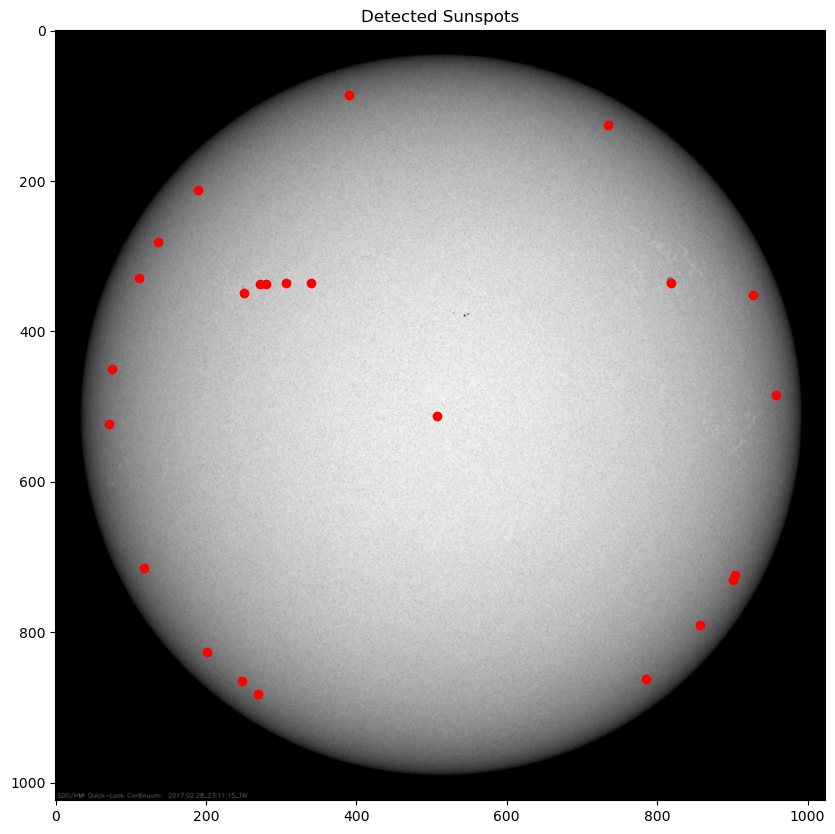

In [22]:
# Run the program
# Replace 'hmi_image.jpg' with the path to your HMI image file
main('SDO_images/20170228_231038_1024_HMII.jpg')
